<style>div.title-slide {    width: 100%;    display: flex;    flex-direction: row;            /* default value; can be omitted */    flex-wrap: nowrap;              /* default value; can be omitted */    justify-content: space-between;}</style><div class="title-slide">
<span style="float:left;">Licence CC BY-NC-ND</span>
<span>Thierry Parmentelat &amp; Arnaud Legout</span>
<span><img src="media/both-logos-small-alpha.png" style="display:inline" /></span>
</div>

# Indexation évoluée

## Complément - niveau avancé

Nous allons maintenant voir qu'il est possible d'indexer un tableau numpy avec, non pas des entiers ou des tuples comme on l'a vu dans un complément précédent, mais aussi avec d'autres types d'objets, qui permettent des manipulations très puissantes :
* indexation par une liste
* indexation par un tableau
* indexation multiple (par un tuple)
* indexation par un tableau de booléens

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.ion()

Pour illustrer ceci, on va réutiliser la fonction `background` qu'on avait vue pour les indexations simples :

In [2]:
# une fonction qui crée un tableau
# tab[i, j] = i + 10 * j
def background(n):
    i = np.arange(n)
    j = i.reshape((n, 1))
    return i + 10 * j

### Indexation par une liste

On peut indexer par une liste d'entiers, ça constitue une généralisation des slices.

In [3]:
b = background(6); print(b)

[[ 0  1  2  3  4  5]
 [10 11 12 13 14 15]
 [20 21 22 23 24 25]
 [30 31 32 33 34 35]
 [40 41 42 43 44 45]
 [50 51 52 53 54 55]]


Si je veux référencer les lignes 1, 3 et 4, je ne peux pas utiliser un slice; mais je peux utiliser une liste à la place :

In [4]:
# il faut lire ceci comme 
# j'indexe b, avec comme indice la liste [1, 3, 4]
b[ [1, 3, 4] ]

array([[10, 11, 12, 13, 14, 15],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45]])

In [5]:
# pareil pour les colonnes, en combinant avec un slice
b [:, [1, 3, 4]]

array([[ 1,  3,  4],
       [11, 13, 14],
       [21, 23, 24],
       [31, 33, 34],
       [41, 43, 44],
       [51, 53, 54]])

In [6]:
# et comme toujours on peut faire du broadcasting
b [:, [1, 3, 4]] = np.arange(1000, 1006).reshape((6, 1)); print(b)

[[   0 1000    2 1000 1000    5]
 [  10 1001   12 1001 1001   15]
 [  20 1002   22 1002 1002   25]
 [  30 1003   32 1003 1003   35]
 [  40 1004   42 1004 1004   45]
 [  50 1005   52 1005 1005   55]]


### Indexation par un tableau

On peut aussi indexer un tableau A .. par un tableau ! Pur que cela ait un sens :
* le tableau d'index doit contenir des entiers,
* tous plus petits que la première dimension de A.

#### Le cas simple: l'entrée et l'index sont de dimension 1.

In [7]:
# le tableau qu'on va indexer 
cubes = np.arange(10) ** 3; print(cubes)

[  0   1   8  27  64 125 216 343 512 729]


In [8]:
# et un index qui est un tableau numpy
# doit contenir des entiers entre 0 et 9
tab = np.array([1, 7, 2])
print(cubes[tab])

[  1 343   8]


In [9]:
# donne - logiquement - le même résultat que
# si l'index était une liste python
lis = [ 1, 7, 2]
print(cubes[lis])

[  1 343   8]


#### De manière générale

Dans le cas général, le résultat de `A[index]`
* a la même forme "externe" que `index`
* où on a remplacé `i` par `A[i]`
* qui peut donc être un tableau si `A` est de dimension > 1

In [10]:
A = np.array([ [0, 'zero'], [1, 'un'], [2, 'deux'], [3, 'trois']]); print(A)

[['0' 'zero']
 ['1' 'un']
 ['2' 'deux']
 ['3' 'trois']]


In [11]:
index = np.array([[1, 0, 2], [3, 2, 3]]); print(index)

[[1 0 2]
 [3 2 3]]


![parts](media/index-parts.png)

In [39]:
B = A[index]
print(B)

[[[10 11 12]
  [ 0  1  2]
  [20 21 22]]

 [[30 31 32]
  [20 21 22]
  [30 31 32]]]


![result](media/index-result.png)

In [41]:
B[1, 2, 1]

31

![result](media/index-detail.png)

Et donc si 
* `index` est de dimension `(i, j, k)` 
* et `A` est  de dimension `(a, b)`
* `A[index]` est de dimension `(i, j, k, b)`
* et il faut que les éléments dans `index` soient dans `[0 .. a[`

 Ce qu'on vérifie ici :

In [14]:
# l'entrée
print(A.shape)

(4, 2)


In [15]:
# l'index
print(index.shape)

(2, 3)


In [16]:
# le résultat
print(A[index].shape)

(2, 3, 2)


#### Cas particulier : entrée de dimension 1, index de dim. > 1
* Lorsque l'entrée `A` est de dimension 1
* Alors la sortie a **exactement** la même forme que l'index
* C'est comme si `A` était une fonction 
* Qu'on applique aux indices dans index

In [17]:
print(cubes)

[  0   1   8  27  64 125 216 343 512 729]


In [18]:
i2 = np.array( [ [2, 4], [8, 9]])
print(i2)

[[2 4]
 [8 9]]


In [19]:
print(cubes[i2])

[[  8  64]
 [512 729]]


#### Application au codage des couleurs dans une image

In [20]:
# je crée une image avec 6 valeurs disposées en diagonale
N = 32
colors = 6

image = np.empty((N, N), dtype = np.int32)
for i in range(N):
    for j in range(N):
       image[i, j] = (i+j) % colors

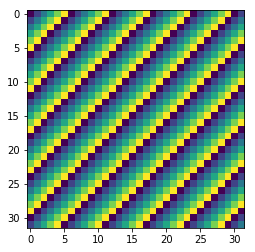

In [21]:
plt.imshow(image);

Notre souci ici est que les couleurs ne sont pas significatives, `imshow` a arbitrairement alloué une couleur à chaque valeur entière  dans `range(colors)`. On voudrait pouvoir choisir la vraie couleur correspondant à chaque valeur. Pour cela on peut utiliser une simple indexation par tableau.

In [22]:
# une palette de couleurs
palette = np.array([
  [255, 255, 255], # 0 -> blanc
  [255, 0, 0],     # 1 -> rouge
  [0, 255, 0],     # 2 -> vert
  [0, 0, 255],     # 3 -> bleu
  [0, 255, 255],   # 4 -> cyan
  [255, 255, 0],   # 5 -> magenta
 ], dtype=np.uint8)

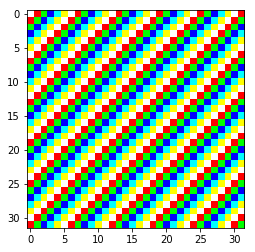

In [23]:
plt.imshow(palette[image]);

Remarquez que la forme générale n'a pas changé, mais le résultat de l'indexation a une dimension supplémentaire de 3 couleurs :

In [24]:
image.shape

(32, 32)

In [25]:
palette[image].shape

(32, 32, 3)

### Indexation multiple (par tuple)

Une fois que vous avez compris ce mécanisme d'indexation par un tableau, on peut encore généraliser pour définir une indexation par deux (ou plus) tableaux de formes identiques.

Ainsi lorsque `index1` et `index2` ont la même forme :
* on peut écrire `A[index1, index2]`
* qui a la même forme externe que les `index`
* où on a remplacé `i, j` par `A[i][j]`
* qui peut donc être un tableau si `A` est de dimension > 2

In [26]:
# un tableau à indexer
ix, iy = np.indices((4, 3))
A = 10 * ix + iy
print(A)

[[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]]


In [27]:
# les deux tableaux d'indices sont carrés 2x2
index1 = [ [3, 2], [0, 1 ]]  # doivent être < 4
index2 = [ [2, 0], [0, 2 ]]  # doivent être < 3
# le résultat est donc carré 2x2
print(A[index1, index2])

[[32 20]
 [ 0 12]]


Et donc si :
* `index1` et `index2` sont de dimension `(i, j, k)` 
* et `A` est  de dimension `(a, b, c)`
* le résultat est de dimension `(i, j, k, c)`
* il faut alors que les éléments  de `index1` soient dans `[0 .. a[` 
* et les éléments de `index2` dans `[0 .. b[`

#### Application à la recherche de maxima

Imaginons que vous avez des mesures pour plusieurs instants :

In [28]:
times = np.linspace(1000, 5000, num=5, dtype=int); print(times)

[1000 2000 3000 4000 5000]


In [29]:
# on aurait 3 mesures à chaque instant
series = np.array( [ [10, 25, 32, 23, 12], [12, 8, 4, 10, 7], [100, 80, 90, 110, 120]])
print(series)

[[ 10  25  32  23  12]
 [ 12   8   4  10   7]
 [100  80  90 110 120]]


Avec la fonction `np.maxargs` on peut retrouver les indices des points maxima dans `series` :

In [30]:
max_indices = np.argmax(series, axis=1)
print(max_indices)

[2 0 4]


Pour trouver les maxima en question, on peut faire :

In [31]:
# les trois maxima, un par serie
maxima = series[ range(series.shape[0]), max_indices ]; print(maxima)

[ 32  12 120]


In [32]:
# et ils correspondent à ces instants-ci
times[max_indices]

array([3000, 1000, 5000])

### Indexation par un tableau de booléens

Une forme un peu spéciale d'indexation consiste à utiliser un tableau de booléens, qui agit comme un masque :

In [33]:
suite = np.array([1, 2, 3, 4, 5, 4, 3, 2, 1])

Je veux filtrer ce tableau et ne garder que les valeurs < 4

In [34]:
# je construis un masque
hauts = suite >= 4
print(hauts)

[False False False  True  True  True False False False]


In [35]:
# je peux utiliser ce masque pour calculer les indices qui sont vrais
suite[hauts]

array([4, 5, 4])

In [36]:
# et utiliser maintenant ceci par un index de tableau 
# par exemple pour annuler ces valeurs
suite[hauts] = 0
print(suite)

[1 2 3 0 0 0 3 2 1]
